In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Restaurant_3.csv')
df.head()

,DATE,TIME,INVOICE_NO,ITEM,QUANTITY,RATE,SUB_TOTAL,AMOUNT,DAY,CATEGORY,PERSON
0,01-10-2023,12.08,3,CHAPPATHI,3,18,54,54.0,1_,MAIN DISH,1.0
1,01-10-2023,12.15,4,CHILLI CHICKEN,1,100,100,320.0,1_,STARTER,2.0
2,01-10-2023,12.15,4,CHICKEN BIRIYANI,2,110,220,NaN,1_,MAIN DISH,NaN
3,01-10-2023,12.15,5,PAROTTA,2,18,36,36.0,1_,MAIN DISH,1.0
4,01-10-2023,12.36,7,KALAKI,1,15,15,69.0,1_,STARTER,1.0


In [ ]:
df.tail()

,DATE,TIME,INVOICE_NO,ITEM,QUANTITY,RATE,SUB_TOTAL,AMOUNT,DAY,CATEGORY,PERSON
608,02-10-2023,22.12,9159,GOLI SODA,3,30,90,728.0,2_,BEVRAGE,NaN
609,02-10-2023,22.12,9159,GHEE PODI ROAST,1,60,60,NaN,2_,MAIN DISH,NaN
610,02-10-2023,22.12,9159,CHICKEN PALLIPALAYAM,1,120,120,NaN,2_,GRAVY,NaN
611,02-10-2023,22.12,9159,PEPPER CHICKEN MASALA,1,130,130,NaN,2_,GRAVY,NaN
612,02-10-2023,22.12,9159,MUSHROOM CHILLI,1,80,80,NaN,2_,STARTER,NaN


In [ ]:
df.describe()

,TIME,INVOICE_NO,QUANTITY,RATE,SUB_TOTAL,AMOUNT,PERSON
count,613.000000,613.000000,613.000000,613.000000,613.000000,243.000000,243.000000
mean,18.219250,686.773246,1.750408,57.918434,77.970636,196.691358,1.901235
std,3.414651,2126.360182,2.189850,46.909974,66.920662,150.282652,1.316817
min,12.080000,1.000000,1.000000,10.000000,10.000000,35.000000,1.000000
25%,15.010000,55.000000,1.000000,18.000000,36.000000,89.500000,1.000000
50%,19.420000,102.000000,1.000000,35.000000,70.000000,151.000000,2.000000
75%,21.270000,154.000000,2.000000,100.000000,100.000000,268.000000,2.000000
max,23.400000,9159.000000,44.000000,530.000000,792.000000,792.000000,15.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        613 non-null    object 
 1   TIME        613 non-null    float64
 2   INVOICE_NO  613 non-null    int64  
 3   ITEM        613 non-null    object 
 4   QUANTITY    613 non-null    int64  
 5   RATE        613 non-null    int64  
 6   SUB_TOTAL   613 non-null    int64  
 7   AMOUNT      243 non-null    float64
 8   DAY         613 non-null    object 
 9   CATEGORY    606 non-null    object 
 10  PERSON      243 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 52.8+ KB


In [ ]:
df.isnull().sum()

DATE            0
TIME            0
INVOICE_NO      0
ITEM            0
QUANTITY        0
RATE            0
SUB_TOTAL       0
AMOUNT        370
DAY             0
CATEGORY        7
PERSON        370
dtype: int64

In [ ]:
df.shape

(613, 11)

In [ ]:
x=df['DATE']=pd.to_datetime(df.DATE,format='%d-%m-%Y')
x

0     2023-10-01
1     2023-10-01
2     2023-10-01
3     2023-10-01
4     2023-10-01
         ...    
608   2023-10-02
609   2023-10-02
610   2023-10-02
611   2023-10-02
612   2023-10-02
Name: DATE, Length: 613, dtype: datetime64[ns]

In [ ]:
df['INVOICE_NO'].nunique()

172

In [ ]:
df['SUB_TOTAL'].sum()

47796

In [ ]:
# 1.Average Order Value of a Restauren
y=df['SUB_TOTAL'].sum()/df['INVOICE_NO'].nunique()
y

277.8837209302326

<ipython-input-112-3f46133ce00d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dish=df.groupby('ITEM').sum().sort_values('SUB_TOTAL', ascending=False)[['SUB_TOTAL']][0:15]


<Axes: xlabel='SUB_TOTAL', ylabel='ITEM'>

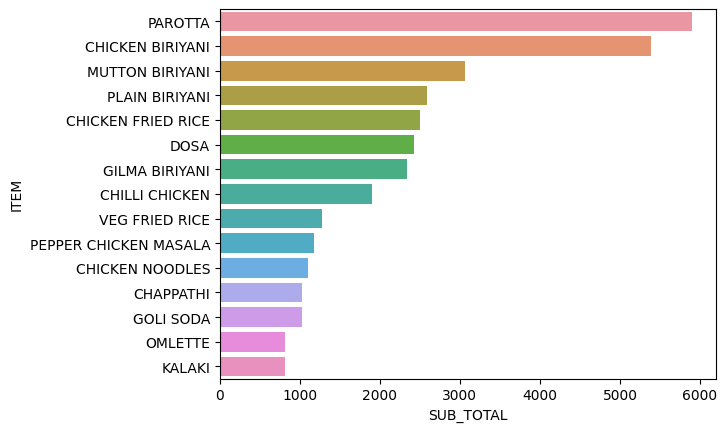

In [ ]:
# 2.Which 15 Dish has gone out by using SubTotal
dish=df.groupby('ITEM').sum().sort_values('SUB_TOTAL', ascending=False)[['SUB_TOTAL']][0:15]
sns.barplot(x='SUB_TOTAL',y=dish.index,data=dish)

<ipython-input-113-abc245b55219>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hghest_quantity=df.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:20]


<Axes: xlabel='QUANTITY', ylabel='ITEM'>

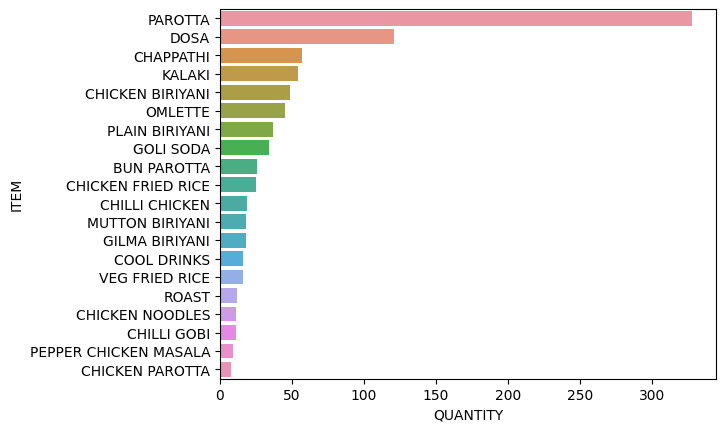

In [ ]:
# 3.
hghest_quantity=df.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:20]
sns.barplot(x='QUANTITY',y=hghest_quantity.index,data=hghest_quantity)

In [ ]:
df['INVOICE_NO']=df['DAY'].astype(str) + df['INVOICE_NO'].astype(str)

df

,DATE,TIME,INVOICE_NO,ITEM,QUANTITY,RATE,SUB_TOTAL,AMOUNT,DAY,CATEGORY,PERSON
0,2023-10-01,12.08,1_3,CHAPPATHI,3,18,54,54.0,1_,MAIN DISH,1.0
1,2023-10-01,12.15,1_4,CHILLI CHICKEN,1,100,100,320.0,1_,STARTER,2.0
2,2023-10-01,12.15,1_4,CHICKEN BIRIYANI,2,110,220,NaN,1_,MAIN DISH,NaN
3,2023-10-01,12.15,1_5,PAROTTA,2,18,36,36.0,1_,MAIN DISH,1.0
4,2023-10-01,12.36,1_7,KALAKI,1,15,15,69.0,1_,STARTER,1.0
...,...,...,...,...,...,...,...,...,...,...,...
608,2023-10-02,22.12,2_9159,GOLI SODA,3,30,90,728.0,2_,BEVRAGE,NaN
609,2023-10-02,22.12,2_9159,GHEE PODI ROAST,1,60,60,NaN,2_,MAIN DISH,NaN
610,2023-10-02,22.12,2_9159,CHICKEN PALLIPALAYAM,1,120,120,NaN,2_,GRAVY,NaN
611,2023-10-02,22.12,2_9159,PEPPER CHICKEN MASALA,1,130,130,NaN,2_,GRAVY,NaN


<ipython-input-115-8d88a49b21a4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dish=night_dishes.groupby('ITEM').sum().sort_values('QUANTITY',ascending = False)[['QUANTITY']][0:10]


<Axes: xlabel='QUANTITY', ylabel='ITEM'>

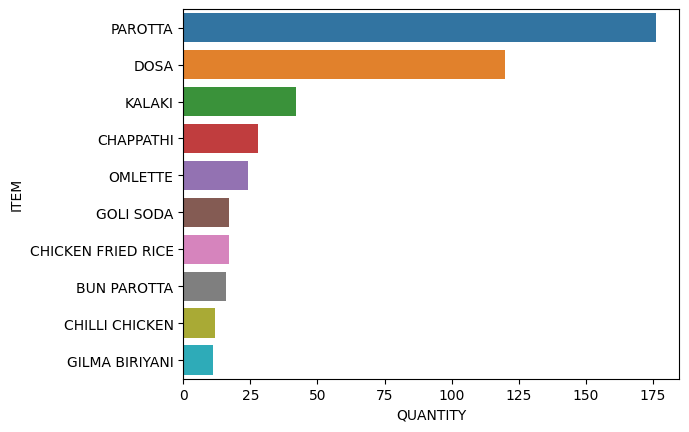

In [ ]:
night_starting_time = 18.00
night_dishes=df[df['TIME']>=night_starting_time]
dish=night_dishes.groupby('ITEM').sum().sort_values('QUANTITY',ascending = False)[['QUANTITY']][0:10]
sns.barplot(x='QUANTITY',y=dish.index,data=dish)

In [ ]:
# To find Average order Value by DayWise
Afternoon_Opening_Time = 12.00
Afternoon_Closing_Time = 17.00
Night_Opening_Time = 18.00
Night_Closing_Time = 23.59

Day_1 = df[df['DATE'] == '2023-10-01']
Day_2 = df[df['DATE'] == '2023-10-02']

Average_Invoice_for_Day1 = Day_1['INVOICE_NO'].nunique()
print('Average order value of Day-1 =',Average_Invoice_for_Day1)

Average_Amount_for_Day1 = Day_1['SUB_TOTAL'].sum()
print('Average amount of Day-1 =',Average_Amount_for_Day1)

Day1_Average = Average_Amount_for_Day1/Average_Invoice_for_Day1
print('Average Order Value Of Day-1 =',Day1_Average)

# To find Average Order Value For Afternoon(Day-1)

Afternoon_Average_Value_Day1 = df[(df['TIME']>= Afternoon_Opening_Time) & (df['TIME']<=Afternoon_Closing_Time)]

Afternoon_Unique_Day1 = Afternoon_Average_Value_Day1['INVOICE_NO'].nunique()
print('Day1 average Invoice Value for afternoon =',Afternoon_Unique_Day1)

Afternoon_Amount = Afternoon_Average_Value_Day1['SUB_TOTAL'].sum()
print('Average Amount for Day1 Afternoon =',Afternoon_Amount)

Average_Order_value_for_Afternoon_of_Day1 = Afternoon_Amount/Afternoon_Unique_Day1
print('Average order Value of Day1 Afternoon =',Average_Order_value_for_Afternoon_of_Day1)

# To find Average order Value for Night(Day-1)

Night_Average_Value = df[(df['TIME']>= Night_Opening_Time) & (df['TIME']<=Night_Closing_Time)]

Night_Unique_Day1 = Night_Average_Value['INVOICE_NO'].nunique()
print('Day1 average Invoice Value for afternoon =',Night_Unique_Day1)

Night_Amount = Night_Average_Value['SUB_TOTAL'].sum()
print('Average Amount for Day1 Afternoon =',Night_Amount)

Average_Order_value_for_Night_of_Day1 = Night_Amount/Night_Unique_Day1
print('Average order Value of Day1 Night =',Average_Order_value_for_Night_of_Day1)

# To find Average order for Day 2

Average_Invoice_for_Day2 = Day_2['INVOICE_NO'].nunique()
print('Average order value of Day-1 =',Average_Invoice_for_Day2)

Average_Amount_for_Day2 = Day_2['SUB_TOTAL'].sum()
print('Average amount of Day-2 =',Average_Amount_for_Day2)

Day2_Average = Average_Amount_for_Day2/Average_Invoice_for_Day2
print('Average Order Value Of Day-2 =',Day2_Average)

## To find Average Order Value For Afternoon(Day-2)

Afternoon_Average_Value_Day2 = df[(df['TIME']>= Afternoon_Opening_Time) & (df['TIME']<=Afternoon_Closing_Time)]

Afternoon_Unique_Day2 = Afternoon_Average_Value_Day2['INVOICE_NO'].nunique()
print('Day2 average Invoice Value for afternoon =',Afternoon_Unique_Day2)


Afternoon_Amount = Afternoon_Average_Value_Day2['SUB_TOTAL'].sum()
print('Average Amount for Day2 Afternoon =',Afternoon_Amount)

Average_Order_value_for_Afternoon_of_Day2 = Afternoon_Amount/Afternoon_Unique_Day2
print('Average order Value of Day2 Afternoon =',Average_Order_value_for_Afternoon_of_Day2)


# To find Average order Value for Night(Day-2)

Night_Average_Value = df[(df['TIME']>= Night_Opening_Time) & (df['TIME']<=Night_Closing_Time)]

Night_Unique_Day2 = Night_Average_Value['INVOICE_NO'].nunique()
print('Day2 average Invoice Value for Night =',Night_Unique_Day2)

Night_Amount = Night_Average_Value['SUB_TOTAL'].sum()
print('Average Amount for Day2 Night =',Night_Amount)

Average_Order_value_for_Night_of_Day2 = Night_Amount/Night_Unique_Day2
print('Average order Value of Day2 Night =',Average_Order_value_for_Night_of_Day2)









Average order value of Day-1 = 123
Average amount of Day-1 = 24193
Average Order Value Of Day-1 = 196.6910569105691
Day1 average Invoice Value for afternoon = 106
Average Amount for Day1 Afternoon = 23098
Average order Value of Day1 Afternoon = 217.9056603773585
Day1 average Invoice Value for afternoon = 132
Average Amount for Day1 Afternoon = 23595
Average order Value of Day1 Night = 178.75
Average order value of Day-1 = 120
Average amount of Day-2 = 23603
Average Order Value Of Day-2 = 196.69166666666666
Day2 average Invoice Value for afternoon = 106
Average Amount for Day2 Afternoon = 23098
Average order Value of Day2 Afternoon = 217.9056603773585
Day2 average Invoice Value for Night = 132
Average Amount for Day2 Night = 23595
Average order Value of Day2 Night = 178.75


<ipython-input-117-8d85e39a262c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_5 = First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]


<Axes: xlabel='QUANTITY', ylabel='ITEM'>

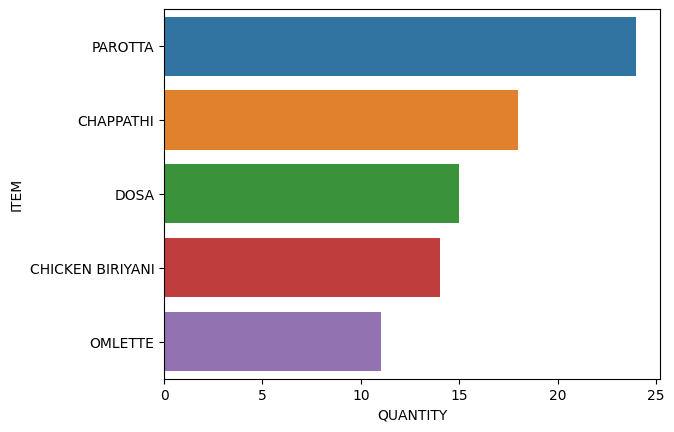

In [ ]:
#Top 5 dishes of person1
Person_wise = 1
First_person = df[df['PERSON'] == 1.0]
Top_5 = First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]
sns.barplot(x='QUANTITY',y=Top_5.index,data=Top_5)


<ipython-input-118-111d9df01b75>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_5_items= First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]


<Axes: xlabel='QUANTITY', ylabel='ITEM'>

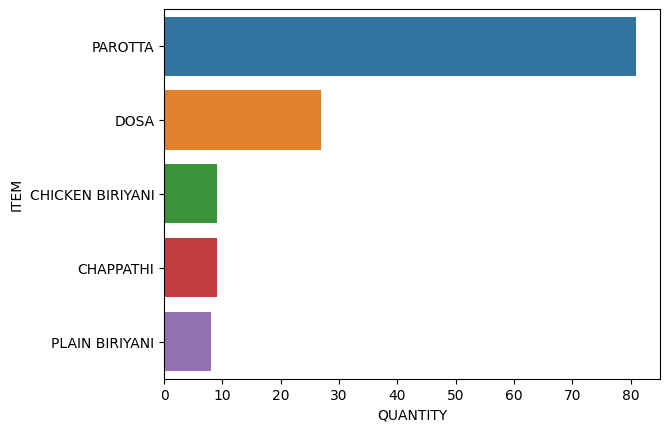

In [ ]:
#Top 5 dishes of person2
Person_wise = 2
First_person = df[df['PERSON'] == 2.0]
Top_5_items= First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]
sns.barplot(x='QUANTITY',y=Top_5_items.index,data=Top_5_items)

<ipython-input-119-1e110a74b8f4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_5_items= First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]


<Axes: xlabel='QUANTITY', ylabel='ITEM'>

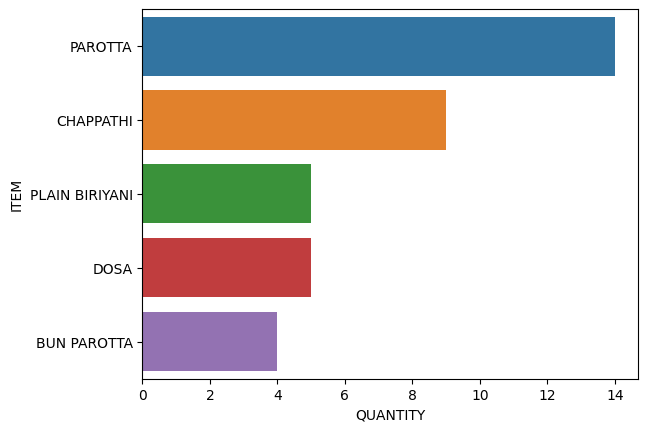

In [ ]:
#Top 5 dishes of person3
Person_wise = 3
First_person = df[df['PERSON'] == 3.0]
Top_5_items= First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]
sns.barplot(x='QUANTITY',y=Top_5_items.index,data=Top_5_items)

<ipython-input-120-3c961e8fe6fa>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_5_items= First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]


<Axes: xlabel='QUANTITY', ylabel='ITEM'>

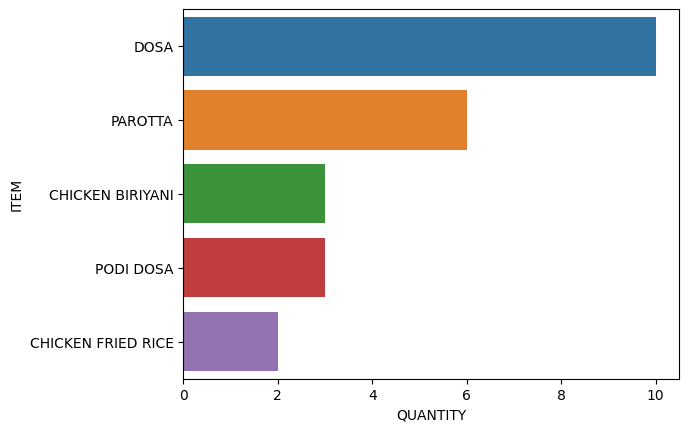

In [ ]:
#Top 5 dishes of person4
Person_wise = 4
First_person = df[df['PERSON'] == 4.0]
Top_5_items= First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]
sns.barplot(x='QUANTITY',y=Top_5_items.index,data=Top_5_items)

<ipython-input-121-7fcaf9441f7c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_5_items= First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]


<Axes: xlabel='QUANTITY', ylabel='ITEM'>

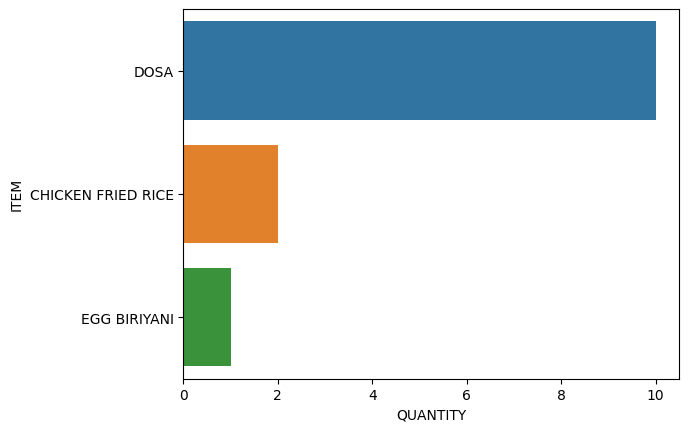

In [ ]:
#Top 5 dishes of person5
Person_wise = 5
First_person = df[df['PERSON'] == 5]
Top_5_items= First_person.groupby('ITEM').sum().sort_values('QUANTITY',ascending=False)[['QUANTITY']][0:5]
sns.barplot(x='QUANTITY',y=Top_5_items.index,data=Top_5_items)

In [ ]:
#Afternoon Average Order Value
afternoon_starting_hour= 12.00
afternoon_ending_hour = 17.59
Afternoon_Average_Value=df[(df['TIME']>=afternoon_starting_hour) & (df['TIME']<= afternoon_ending_hour)]
afternoon_unique = Afternoon_Average_Value['INVOICE_NO'].nunique()
print('Afternoon_Average = ',afternoon_unique)
afternoon_Sub_total=Afternoon_Average_Value['SUB_TOTAL'].sum()
print('Afternoon Amount =',afternoon_Sub_total)
Average_Order_value_of_Afternoon = afternoon_Sub_total/afternoon_unique
print('Average order value of Afternoon = ',Average_Order_value_of_Afternoon)
# Night Average Order Value
night_starting_time=18.00
night_ending_time=23.59
Night_Average_Value=df[(df['TIME']>=night_starting_time) & (df['TIME']<=night_ending_time)]
Night_Unique = Night_Average_Value['INVOICE_NO'].nunique()
print('Night Average Invoice = ',Night_Unique)
Night_Average_Amount = Night_Average_Value['SUB_TOTAL'].sum()
print('Night Average Income = ',Night_Average_Amount)
Night_Average_Order_Value = Night_Average_Amount/Night_Unique
print('Average Order Value of Night = ',Night_Average_Order_Value)










Afternoon_Average =  111
Afternoon Amount = 24201
Average order value of Afternoon =  218.02702702702703
Night Average Invoice =  132
Night Average Income =  23595
Average Order Value of Night =  178.75


In [ ]:
# To Find Individual Average Order value for Persons wise

#Afternoon_Opening_Time = 12.00
#Afternoon_Closing_Time = 17.00
#Night_Opening_Time = 18.00
#Night_Closing_Time = 23.59



Day_1 = df[df['DATE'] == '2023-10-01']
Day_2 = df[df['DATE'] == '2023-10-02']


Person1 = 1.0
Person2 = 2.0
Person3 = 3.0
Person4 = 4.0
Person5 = 5.0


# Day1 Average Order alue
Average_Invoice_Day1=Day_1['INVOICE_NO'].nunique()
print("Average Invoice of Day1 =",  Average_Invoice_Day1)

Average_Amount_Day1=Day_1['AMOUNT'].sum()
print("Average Amount of Day1 =",  Average_Amount_Day1)

Average_order_Day1 = Average_Amount_Day1/Average_Invoice_Day1
print(" Average Order Value of Day1 =",  Average_order_Day1)


#Person1 Average Order Value
Person1_Average_Day = df[df['PERSON'] == 1.0]

Person1_Average_Invoice = Person1_Average_Day['INVOICE_NO'].nunique()
print("Average Invoice of Person1 =",  Person1_Average_Invoice)

Person1_Average_Amount = Person1_Average_Day['AMOUNT'].sum()
print("Average Amount of Person1 =",Person1_Average_Amount)

Person1_Average_Day1_Order = Person1_Average_Amount/Person1_Average_Invoice
print("Average Order Value of Person1 in Day1 =",Person1_Average_Day1_Order)


# person2 Average Order Value
Person2_Average_Day = df[df['PERSON'] == 2.0]

Person2_Average_Invoice = Person2_Average_Day['INVOICE_NO'].nunique()
print("Average Invoice of Person2 =",  Person2_Average_Invoice)

Person2_Average_Amount = Person2_Average_Day['AMOUNT'].sum()
print("Average Amount of Person2 =",Person2_Average_Amount)

Person2_Average_Day1_Order = Person2_Average_Amount/Person2_Average_Invoice
print("Average Order Value of Person2 in Day1 =",Person2_Average_Day1_Order)


# person3 Average Order Value
Person3_Average_Day = df[df['PERSON'] == 3.0]

Person3_Average_Invoice = Person3_Average_Day['INVOICE_NO'].nunique()
print("Average Invoice of Person3 =",  Person3_Average_Invoice)

Person3_Average_Amount = Person3_Average_Day['AMOUNT'].sum()
print("Average Amount of Person3 =",Person3_Average_Amount)

Person3_Average_Day1_Order = Person3_Average_Amount/Person3_Average_Invoice
print("Average Order Value of Person3 in Day1 =",Person3_Average_Day1_Order)


# person4 Average Order Value
Person4_Average_Day = df[df['PERSON'] == 4.0]

Person4_Average_Invoice = Person4_Average_Day['INVOICE_NO'].nunique()
print("Average Invoice of Person4 =",  Person4_Average_Invoice)

Person4_Average_Amount = Person4_Average_Day['AMOUNT'].sum()
print("Average Amount of Person4 =",Person4_Average_Amount)

Person4_Average_Day1_Order = Person4_Average_Amount/Person4_Average_Invoice
print("Average Order Value of Person4 in Day1 =",Person4_Average_Day1_Order)


# person5 Average Order Value
Person5_Average_Day = df[df['PERSON'] == 5.0]

Person5_Average_Invoice = Person5_Average_Day['INVOICE_NO'].nunique()
print("Average Invoice of Person5 =",  Person5_Average_Invoice)

Person5_Average_Amount = Person5_Average_Day['AMOUNT'].sum()
print("Average Amount of Person5 =",Person5_Average_Amount)

Person5_Average_Day1_Order = Person5_Average_Amount/Person5_Average_Invoice
print("Average Order Value of Person5 in Day1 =",Person5_Average_Day1_Order)














Average Invoice of Day1 = 123
Average Amount of Day1 = 24193.0
 Average Order Value of Day1 = 196.6910569105691
Average Invoice of Person1 = 100
Average Amount of Person1 = 5407.0
Average Order Value of Person1 in Day1 = 54.07
Average Invoice of Person2 = 100
Average Amount of Person2 = 4382.0
Average Order Value of Person2 in Day1 = 43.82
Average Invoice of Person3 = 30
Average Amount of Person3 = 2060.0
Average Order Value of Person3 in Day1 = 68.66666666666667
Average Invoice of Person4 = 8
Average Amount of Person4 = 1140.0
Average Order Value of Person4 in Day1 = 142.5
Average Invoice of Person5 = 3
Average Amount of Person5 = 200.0
Average Order Value of Person5 in Day1 = 66.66666666666667


In [ ]:
# 1-person Average Order Value

x = df.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y = x[x['PERSON'] == 1]
First_person_Amount= y['AMOUNT'].sum()
print('Person1 Average Amount =',First_person_Amount)

X = df[df['PERSON'] == 1]
First_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person1 Average Invoice =',First_person_Average_Invoice)


First_Person_Average_Order = First_person_Amount/First_person_Average_Invoice
print('Average order of Person-1 =',First_Person_Average_Order)


# 2-person Average Order Value

x = df.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y = x[x['PERSON'] == 2]
Second_person_Amount= y['AMOUNT'].sum()
print('Person2 Average Amount =',Second_person_Amount)

X = df[df['PERSON'] == 2]
Second_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person2 Average Invoice =',Second_person_Average_Invoice)


Second_Person_Average_Order = Second_person_Amount/Second_person_Average_Invoice
print('Average order of Person-2 =',Second_Person_Average_Order)


# 3-person Average Order Value

x = df.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y = x[x['PERSON'] == 3]
Third_person_Amount= y['AMOUNT'].sum()
print('Person3 Average Amount =',Third_person_Amount)

X = df[df['PERSON'] == 3]
Third_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person3 Average Invoice =',Third_person_Average_Invoice)


Third_Person_Average_Order = Third_person_Amount/Third_person_Average_Invoice
print('Average order of Person-3 =',Third_Person_Average_Order)



# 4-person Average Order Value

x = df.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y = x[x['PERSON'] == 4]
Fourth_person_Amount= y['AMOUNT'].sum()
print('Person4 Average Amount =',Fourth_person_Amount)

X = df[df['PERSON'] == 4]
Fourth_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person4 Average Invoice =',Fourth_person_Average_Invoice)


Fourth_Person_Average_Order = Fourth_person_Amount/Fourth_person_Average_Invoice
print('Average order of Person-4 =',Fourth_Person_Average_Order)



# 5-person Average Order Value

x = df.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y = x[x['PERSON'] == 5]
Fifth_person_Amount= y['AMOUNT'].sum()
print('Person5 Average Amount =',Fifth_person_Amount)

X = df[df['PERSON'] == 5]
Fifth_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person5 Average Invoice =',Fifth_person_Average_Invoice)


Fifth_Person_Average_Order = Fifth_person_Amount/Fifth_person_Average_Invoice
print('Average order of Person-5 =',Fifth_Person_Average_Order)


# 6 and above person Average Order Value

x = df.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y = x[x['PERSON'] >= 6]
six_and_greater_person_Amount= y['AMOUNT'].sum()
print('Person6 and above Average Amount =',six_and_greater_person_Amount)

X = df[df['PERSON'] >= 6]
six_and_greater_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person6 and above Average Invoice =',six_and_greater_person_Average_Invoice)


six_and_greater_Person_Average_Order = six_and_greater_person_Amount/six_and_greater_person_Average_Invoice
print('Average order of Person-6 and above =',six_and_greater_Person_Average_Order)




Person1 Average Amount = 9736.0
Person1 Average Invoice = 100
Average order of Person-1 = 97.36
Person2 Average Amount = 20868.0
Person2 Average Invoice = 100
Average order of Person-2 = 208.68
Person3 Average Amount = 10855.0
Person3 Average Invoice = 30
Average order of Person-3 = 361.8333333333333
Person4 Average Amount = 3729.0
Person4 Average Invoice = 8
Average order of Person-4 = 466.125
Person5 Average Amount = 1161.0
Person5 Average Invoice = 3
Average order of Person-5 = 387.0
Person6 and above Average Amount = 1447.0
Person6 and above Average Invoice = 2
Average order of Person-6 and above = 723.5


<ipython-input-124-f015997bfb14>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
<ipython-input-124-f015997bfb14>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
<ipython-input-124-f015997bfb14>:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = df.groupby('INVOICE_NO').sum().sort_values('SUB_TOTA

In [ ]:
#######
#######
Person1 = 1.0
Person2 = 2.0
Person3 = 3.0

Afternoon_Opening_Time = 12.00
Afternoon_Closing_Time = 17.00
Night_Opening_Time = 18.00
Night_Closing_Time = 23.59

Day1_AN = df[(df['TIME'] >= Afternoon_Opening_Time) & (df['TIME'] <= Afternoon_Closing_Time)]
Afternoon_Unique_Invoice = Day1_AN['INVOICE_NO'].nunique()
print('Afternoon Unique Invoice =',Afternoon_Unique_Invoice)

Afternoon_Amount = Day1_AN['AMOUNT'].sum()
print('Afternoon Average Amount =',Afternoon_Amount)

Day1_Average_Order = Afternoon_Amount/Afternoon_Unique_Invoice
print("1st day Average Order Value for Afternoon =",Day1_Average_Order)

Person1= df[df['PERSON'] == Person1]
Person1_Average_Invoice = Person1['INVOICE_NO'].nunique()
print("Average Invoice of Person1 =",  Person1_Average_Invoice)

Person1_Average_Amount = Person1['AMOUNT'].sum()
print("Average Amount Of Person1 =", Person1_Average_Amount)

Average_order_value_of_person1 = Person1_Average_Amount/Person1_Average_Invoice
print("Average order Value of person1 =", Average_order_value_of_person1)














Afternoon Unique Invoice = 106
Afternoon Average Amount = 23098.0
1st day Average Order Value for Afternoon = 217.9056603773585
Average Invoice of Person1 = 100
Average Amount Of Person1 = 5407.0
Average order Value of person1 = 54.07


In [ ]:
Afternoon_Opening_Time = 12.00
Afternoon_Closing_Time = 17.59



AN = df[(df['TIME'] >= Afternoon_Opening_Time) & (df['TIME'] <= Afternoon_Closing_Time)]
x=AN.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON']==1]
First_person_Amount= y['AMOUNT'].sum()
print('Person1 Average Amount =',First_person_Amount)


X=AN[AN['PERSON']==1]
First_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person1 Average Invoice =',First_person_Average_Invoice)


First_Person_Average_Order = First_person_Amount/First_person_Average_Invoice
print('Average order of Person-1 =',First_Person_Average_Order)


# 2
AN = df[(df['TIME'] >= Afternoon_Opening_Time) & (df['TIME'] <= Afternoon_Closing_Time)]
x=AN.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y = x[x['PERSON'] == 2]
Second_person_Amount= y['AMOUNT'].sum()
print('Person2 Average Amount =',Second_person_Amount)

X = AN[AN['PERSON'] == 2]
Second_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person2 Average Invoice =',Second_person_Average_Invoice)


Second_Person_Average_Order = Second_person_Amount/Second_person_Average_Invoice
print('Average order of Person-2 =',Second_Person_Average_Order)

# 3
AN = df[(df['TIME'] >= Afternoon_Opening_Time) & (df['TIME'] <= Afternoon_Closing_Time)]
x=AN.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON'] == 3]
Third_person_Amount= y['AMOUNT'].sum()
print('Person3 Average Amount =',Third_person_Amount)

X = AN[AN['PERSON'] == 3]
Third_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person3 Average Invoice =',Third_person_Average_Invoice)


Third_Person_Average_Order = Third_person_Amount/Third_person_Average_Invoice
print('Average order of Person-3 =',Third_Person_Average_Order)

# 4
AN = df[(df['TIME'] >= Afternoon_Opening_Time) & (df['TIME'] <= Afternoon_Closing_Time)]
x=AN.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON'] == 4]
Fourth_person_Amount= y['AMOUNT'].sum()
print('Person4 Average Amount =',Fourth_person_Amount)

X = AN[AN['PERSON'] == 4]
Fourth_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person4 Average Invoice =',Fourth_person_Average_Invoice)


Fourth_Person_Average_Order = Fourth_person_Amount/Fourth_person_Average_Invoice
print('Average order of Person-4 =',Fourth_Person_Average_Order)

# 5
AN = df[(df['TIME'] >= Afternoon_Opening_Time) & (df['TIME'] <= Afternoon_Closing_Time)]
x=AN.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON'] == 5]
Fifth_person_Amount= y['AMOUNT'].sum()
print('Person5 Average Amount =',Fifth_person_Amount)

X = AN[AN['PERSON'] == 5]
Fifth_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person5 Average Invoice =',Fifth_person_Average_Invoice)


Fifth_Person_Average_Order = Fifth_person_Amount/Fifth_person_Average_Invoice
print('Average order of Person-5 =',Fifth_Person_Average_Order)




# 6 and above
AN = df[(df['TIME'] >= Afternoon_Opening_Time) & (df['TIME'] <= Afternoon_Closing_Time)]
x=AN.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON']>=6]
six_and_greater_person_Amount= y['AMOUNT'].sum()
print('Person6 and above Average Amount =',six_and_greater_person_Amount)



X = AN[AN['PERSON'] >= 6]
six_and_greater_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person6 and above Average Invoice =',six_and_greater_person_Average_Invoice)


six_and_greater_Person_Average_Order = six_and_greater_person_Amount/six_and_greater_person_Average_Invoice
print('Average order of Person-6 and above =',six_and_greater_Person_Average_Order)









Person1 Average Amount = 5239.0
Person1 Average Invoice = 48
Average order of Person-1 = 109.14583333333333
Person2 Average Amount = 10775.0
Person2 Average Invoice = 43
Average order of Person-2 = 250.58139534883722
Person3 Average Amount = 5313.0
Person3 Average Invoice = 14
Average order of Person-3 = 379.5
Person4 Average Amount = 1786.0
Person4 Average Invoice = 4
Average order of Person-4 = 446.5
Person5 Average Amount = 296.0
Person5 Average Invoice = 1
Average order of Person-5 = 296.0
Person6 and above Average Amount = 792.0
Person6 and above Average Invoice = 1
Average order of Person-6 and above = 792.0


<ipython-input-142-98e4ed86f464>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=AN.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
<ipython-input-142-98e4ed86f464>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=AN.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
<ipython-input-142-98e4ed86f464>:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=AN.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
<i

In [ ]:
Night_Opening_Time = 18.00
Night_Closing_Time = 23.59

# 1
Nyt = df[(df['TIME'] >= Night_Opening_Time) & (df['TIME'] <= Night_Closing_Time)]
x=Nyt.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON']==1]
First_person_Amount= y['AMOUNT'].sum()
print('Person1 Average Amount =',First_person_Amount)


X=Nyt[Nyt['PERSON']==1]
First_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person1 Average Invoice =',First_person_Average_Invoice)


First_Person_Average_Order = First_person_Amount/First_person_Average_Invoice
print('Average order of Person-1 =',First_Person_Average_Order)


# 2

Nyt = df[(df['TIME'] >= Night_Opening_Time) & (df['TIME'] <= Night_Closing_Time)]
x=Nyt.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y = x[x['PERSON'] == 2]
Second_person_Amount= y['AMOUNT'].sum()
print('Person2 Average Amount =',Second_person_Amount)

X = Nyt[Nyt['PERSON'] == 2]
Second_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person2 Average Invoice =',Second_person_Average_Invoice)


Second_Person_Average_Order = Second_person_Amount/Second_person_Average_Invoice
print('Average order of Person-2 =',Second_Person_Average_Order)


# 3
Nyt = df[(df['TIME'] >= Night_Opening_Time) & (df['TIME'] <= Night_Closing_Time)]
x=Nyt.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON'] == 3]
Third_person_Amount= y['AMOUNT'].sum()
print('Person3 Average Amount =',Third_person_Amount)

X = Nyt[Nyt['PERSON'] == 3]
Third_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person3 Average Invoice =',Third_person_Average_Invoice)


Third_Person_Average_Order = Third_person_Amount/Third_person_Average_Invoice
print('Average order of Person-3 =',Third_Person_Average_Order)

# 4
Nyt = df[(df['TIME'] >= Night_Opening_Time) & (df['TIME'] <= Night_Closing_Time)]
x=Nyt.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON'] == 4]
Fourth_person_Amount= y['AMOUNT'].sum()
print('Person4 Average Amount =',Fourth_person_Amount)

X = Nyt[Nyt['PERSON'] == 4]
Fourth_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person4 Average Invoice =',Fourth_person_Average_Invoice)


Fourth_Person_Average_Order = Fourth_person_Amount/Fourth_person_Average_Invoice
print('Average order of Person-4 =',Fourth_Person_Average_Order)

# 5
Nyt= df[(df['TIME'] >= Night_Opening_Time) & (df['TIME'] <= Night_Closing_Time)]
x=Nyt.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON'] == 5]
Fifth_person_Amount= y['AMOUNT'].sum()
print('Person5 Average Amount =',Fifth_person_Amount)

X = Nyt[Nyt['PERSON'] == 5]
Fifth_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person5 Average Invoice =',Fifth_person_Average_Invoice)


Fifth_Person_Average_Order = Fifth_person_Amount/Fifth_person_Average_Invoice
print('Average order of Person-5 =',Fifth_Person_Average_Order)

# 6 and above
Nyt= df[(df['TIME'] >= Night_Opening_Time) & (df['TIME'] <= Night_Closing_Time)]
x=Nyt.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
y=x[x['PERSON']>=6]
six_and_greater_person_Amount= y['AMOUNT'].sum()
print('Person6 and above Average Amount =',six_and_greater_person_Amount)



X = Nyt[Nyt['PERSON'] >= 6]
six_and_greater_person_Average_Invoice = X['INVOICE_NO'].nunique()
print('Person6 and above Average Invoice =',six_and_greater_person_Average_Invoice)


six_and_greater_Person_Average_Order = six_and_greater_person_Amount/six_and_greater_person_Average_Invoice
print('Average order of Person-6 and above =',six_and_greater_Person_Average_Order)



Person1 Average Amount = 4497.0
Person1 Average Invoice = 52
Average order of Person-1 = 86.48076923076923
Person2 Average Amount = 10093.0
Person2 Average Invoice = 57
Average order of Person-2 = 177.0701754385965
Person3 Average Amount = 5542.0
Person3 Average Invoice = 16
Average order of Person-3 = 346.375
Person4 Average Amount = 1943.0
Person4 Average Invoice = 4
Average order of Person-4 = 485.75
Person5 Average Amount = 865.0
Person5 Average Invoice = 2
Average order of Person-5 = 432.5
Person6 and above Average Amount = 655.0
Person6 and above Average Invoice = 1
Average order of Person-6 and above = 655.0


<ipython-input-145-4e69251217e0>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=Nyt.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
<ipython-input-145-4e69251217e0>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=Nyt.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')
<ipython-input-145-4e69251217e0>:40: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x=Nyt.groupby('INVOICE_NO').sum().sort_values('SUB_TOTAL')